# <a href="https://mipt-stats.gitlab.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Задание 7

**Правила:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`.
* Дедлайн **24 апреля в 23:00**. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb` и все фотографии, если пишете теоретическую часть от руки.
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Публикация решения может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него.

-----

*Замечания.* Теоретические решения можно оформить
* в $\LaTeX$-формате в ноутбуке;
* написать от руки и прикрепить к ноутбуку;
* написать от руки и выслать боту.  

Во втором случае также **важно** "вшить" фото в ноутбук. Сделать это можно с помощью Edit -> Insert Image в Jupyter или с помощью кнопки "Вставить изображение" в Colab. Следите за размером итогового файла.

Фотографии принимаются только в хорошем качестве, **следите за освещением и почерком**. На фотографиях также указывайте номера задач.

-----

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as sps

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.3)
%matplotlib inline

##Задача 1 

(6 баллов)

Проводится испытание нового учебника по математике. Для исследований были отобраны 2500 школьников. Некоторые из них учились по новому учебнику, а другие — по старому. Измеряется количество школьников, сдавших пробный ЕГЭ на 4 и 5. В первой группе экзамен хорошо сдали 853  из 1719 школьников, учившихся по новому учебнику. Во второй группе значимое улучшение наблюдается среди  хорошо сдали 369  из 781 школьников, учившихся по старому. Влияет ли новый
учебник на результаты школьников?

*Основной поток* (+4 балла): Посчитайте коэффициенты ассоциации, контингенции и коэффициент корреляции Крамера. Сделайте выводы.

*Задачу можно писать на листочке. Все совпадения с реальными лицами и ситуациями случайны:)*

In [273]:
Table = np.array([[853,866],[369,412]])
Table

array([[853, 866],
       [369, 412]])

Точный тест Фишера:

In [256]:
sps.fisher_exact(Table)

(1.099770304862402, 0.2806574506919555)

Получается, что связь есть. Поссчитаем коэффициенты:

In [250]:
Q = (853*412 - 866*369)/(853*412 + 866*369)
Q

0.0475148660933844

In [252]:
V = (853*412 - 866*369)/np.sqrt( (853 + 369) * (853 + 866) * (866 + 412) * (369 + 412) )
V

0.022018162484230275

In [274]:
np.sqrt(Xi_sq(Table)/2500)

0.02201816248423024

Все три коэффициента показывают слабую свзяь

---

## Задача 2

Рассмотрим последовательность чисел

    1.05, 1.12, 1.37, 1.50, 1.51, 1.73, 1.85, 1.98, 2.03, 2.17 


*Базовый поток* (4 балла): Посчитайте коэффициенты корреляции Пирсона, Спирмена и Кендалла для этой последовательности и последовательности 

    1, 2, 3, 4, 5, 6, 7, 8, 9, 10

Сделайте выводы.

*Основной поток* (8 баллов): Можно ли на уровне значимости 0.05 считать, что эта последовательность чисел 
является реализацией случайного вектора, все 10 компонент которого независимые одинаково распределенные случайные величины? Вывод сделайте на основе коэффициентов корреляции. Придумайте алгоритм проверки самостоятельно.

---

Построим график:

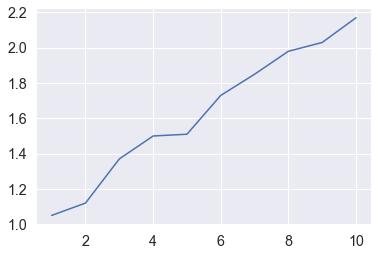

In [2]:
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10],[1.05, 1.12, 1.37, 1.50, 1.51, 1.73, 1.85, 1.98, 2.03, 2.17])

In [3]:
X = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Y = [1.05, 1.12, 1.37, 1.50, 1.51, 1.73, 1.85, 1.98, 2.03, 2.17]

Видим зависимость на "глазок". Посчитаем коээфициенты кореляции

In [9]:
Pearson = sps.pearsonr(X,Y)
Spearman = sps.spearmanr(X,Y)
Kendalltau = sps.kendalltau(X,Y)
Pearson,Spearman,Kendalltau

((0.992198295028627, 1.6057001182059872e-08),
 SpearmanrResult(correlation=0.9999999999999999, pvalue=6.646897422032013e-64),
 KendalltauResult(correlation=0.9999999999999999, pvalue=5.511463844797178e-07))

Применим множественную проверку гипотез:

In [12]:
from statsmodels.sandbox.stats.multicomp import multipletests

multipletests([Pearson[1],Spearman[1],Kendalltau[1]], method = 'holm')

(array([ True,  True,  True]),
 array([3.21140024e-08, 1.99406923e-63, 5.51146384e-07]),
 0.016952427508441503,
 0.016666666666666666)

Все три критерия отвергли. Ответ: нельзя

## Задача 3: Белые мыши наносят ответный удар

(14 баллов)

Скачаем [данные](https://www.kaggle.com/ruslankl/mice-protein-expression) об экспрессии генов различных белков в головном мозге белых мышей.

В этом датасете представлены уровни экспрессии 77 белков, измеренные в коре головного мозга 8 классов мышей, некоторые из которых страдают синдромом Дауна, а некоторые были подвержены контекстному обусловливанию страха, задачи, используемой для оценки ассоциативного обучения.

Данные содержат информацию о 38 контрольных мышей и 34 трисомных мышей (синдром Дауна), то есть всего 72 мышки. Проведено 15 измерений каждого белка для каждой мышки, то есть каждой мыши соответствует несколько записей в таблице.

Загрузим данные и посмотрим на начало таблицы. Всего мы имеем 82 колонки, в большинстве их которых содержатся вещественные данные (уровни экспрессии 77 белков). Остальные колонки содержат категориальные данные (с небольшим числом значений).

In [17]:
data = pd.read_csv("archive (2)/Data_Cortex_Nuclear.csv")
data.head()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m


Чтобы вспомнить, что это за данные, для начала выведем простые описательные статистики по вещественным параметрам.

In [ ]:
data.describe()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,pNUMB_N,RAPTOR_N,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
count,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1062.000000,1077.000000,1077.000000,1077.000000,1073.000000,1077.000000,1077.000000,1077.000000,1062.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,867.000000,795.000000,1080.000000,1005.000000,1080.000000,900.000000,870.000000,810.000000,1080.000000
mean,0.425810,0.617102,0.319088,2.297269,3.843934,0.233168,0.181846,3.537109,0.212574,1.428682,0.545904,0.313505,0.317939,0.275033,0.825813,0.726933,1.561965,1.525338,0.442848,0.682236,0.378519,0.363357,0.180492,1.173400,2.474492,1.172603,0.241644,0.272789,0.693180,0.168417,0.404808,2.146550,0.542635,0.452459,0.415311,0.759047,0.585186,0.368370,0.565317,0.357095,0.315813,0.418605,0.394475,0.181080,0.943116,0.161211,1.706599,0.292434,0.429226,1.197420,0.216482,0.166631,0.179307,0.121521,0.156478,0.181300,0.210489,0.120889,0.221851,0.126560,0.527349,0.291276,1.548348,2.235236,0.159821,1.239270,0.848767,0.226676,0.157914,0.134762,0.121521,0.131053,0.446073,0.169609,0.183135,0.205440,1.337784
std,0.249362,0.251640,0.049383,0.347293,0.933100,0.041634,0.027042,1.295169,0.032587,0.466904,0.345309,0.051978,0.052236,0.046164,0.117969,0.188013,0.270737,0.481780,0.066672,0.127434,0.216388,0.052352,0.026370,0.335786,0.653397,0.244752,0.033901,0.041075,0.120825,0.028138,0.061173,0.435742,0.280568,0.065488,0.089290,0.122446,0.100601,0.062583,0.088201,0.063025,0.054163,0.067288,0.156170,0.029296,0.172838,0.019308,0.578442,0.037380,0.137440,0.361743,0.185309,0.031896,0.018826,0.014276,0.015071,0.024919,0.069010,0.013233,0.034886,0.026885,0.082057,0.030015,0.248132,0.254395,0.024150,0.173580,0.094311,0.028989,0.029537,0.027417,0.014276,0.023863,0.066432,0.059402,0.040406,0.055514,0.317126
min,0.145327,0.245359,0.115181,1.330831,1.737540,0.063236,0.064043,1.343998,0.112812,0.429032,0.149155,0.052110,0.191431,0.056818,0.500160,0.281285,0.301609,0.567840,0.095942,0.064421,0.143894,0.212960,0.113636,0.497695,1.131796,0.151124,0.046298,0.147201,0.198743,0.107394,0.235595,1.134886,0.217120,0.201143,0.227880,0.166579,0.155321,0.226409,0.184785,0.185598,0.194824,0.237777,0.131120,0.117999,0.344120,0.099976,0.598767,0.181157,0.130206,0.529108,0.052528,-0.062008,0.072326,0.067254,0.100217,0.099734,0.096233,0.086114,0.111382,0.072580,0.284001,0.207438,0.853176,1.206098,0.101233,0.750664,0.577397,0.155869,0.088305,0.080657,0.067254,0.085419,0.258626,0.079691,0.105537,0.101787,0.586479
25%,0.288121,0.473361,0.287444,2.057411,3.155678,0.205755,0.164595,2.479834,0.190823,1.203665,0.337405,0.281242,0.281829,0.244287,0.743491,0.590303,1.381288,1.168258,0.404144,0.596816,0.264334,0.330859,0.161830,0.944435,1.991756,1.023134,0.220400,0.247096,0.617074,0.149622,0.366339,1.826707,0.319639,0.410389,0.351992,0.683501,0.530881,0.326621,0.514892,0.312766,0.276127,0.371976,0.281090,0.

Количество записей каждого класса:

In [ ]:
data['class'].value_counts()

c-CS-m    150
c-SC-m    150
t-SC-s    135
c-CS-s    135
c-SC-s    135
t-CS-m    135
t-SC-m    135
t-CS-s    105
Name: class, dtype: int64

Количество записей по генотипам:

In [ ]:
data.Genotype.value_counts()

Control    570
Ts65Dn     510
Name: Genotype, dtype: int64

В начале исследования полезно посмотреть на данные визуально. Посмотрим на зависимость уровней экспрессии разных белков друг от друга. Визуализируйте данные в первых десяти колонках в двумерных проекциях, используя `sns.pairplot`. 

In [31]:
data[Index].transpose()

,0,1,2,3,4,5,6,7,8,9,...,1070,1071,1072,1073,1074,1075,1076,1077,1078,1079
DYRK1A_N,0.503644,0.514617,0.509183,0.442107,0.434940,0.447506,0.428033,0.416923,0.386311,0.380827,...,0.355136,0.318448,0.333438,0.280946,0.230977,0.254860,0.272198,0.228700,0.221242,0.302626
ITSN1_N,0.747193,0.689064,0.730247,0.617076,0.617430,0.628176,0.573696,0.564036,0.538428,0.499294,...,0.588026,0.509701,0.514353,0.528821,0.423589,0.463591,0.474163,0.395179,0.412894,0.461059
BDNF_N,0.430175,0.411770,0.418309,0.358626,0.358802,0.367388,0.342709,0.327703,0.317720,0.362462,...,0.314915,0.290576,0.316404,0.299645,0.254439,0.254860,0.251638,0.234118,0.243974,0.256564
NR1_N,2.816329,2.789514,2.687201,2.466947,2.365785,2.385939,2.334224,2.260135,2.125725,2.096266,...,2.544507,2.314752,2.317035,2.290991,1.868897,2.092082,2.161390,1.733184,1.876347,2.092790
NR2A_N,5.990152,5.685038,5.622059,4.979503,4.718679,4.807635,4.473130,4.268735,4.063950,3.598587,...,3.981010,3.041115,3.451893,3.243548,2.447210,2.600035,2.801492,2.220852,2.384088,2.594348
pAKT_N,0.218830,0.211636,0.209011,0.222886,0.213106,0.218578,0.225173,0.214834,0.207222,0.227649,...,0.224713,0.229135,0.235962,0.246021,0.209734,0.211736,0.251274,0.220665,0.208897,0.251001
pBRAF_N,0.177565,0.172817,0.175722,0.176463,0.173627,0.176233,0.184004,0.179668,0.167778,0.188093,...,0.178030,0.175855,0.201262,0.195797,0.150761,0.171262,0.182496,0.161435,0.173623,0.191811
pCAMKII_N,2.373744,2.292150,2.283337,2.152301,2.134014,2.141282,2.012414,2.007985,1.861514,1.717861,...,3.326520,2.881429,2.955047,2.946067,2.184052,2.483740,2.512737,1.989723,2.086028,2.361816
pCREB_N,0.232224,0.226972,0.230247,0.207004,0.192158,0.195188,0.195789,0.189803,0.180684,0.188093,...,0.241857,0.206036,0.215457,0.221759,0.187381,0.207317,0.216339,0.185164,0.192044,0.223632
pELK_N,1.750936,1.596377,1.561316,1.595086,1.504230,1.442398,1.612036,1.424601,1.261891,1.414329,...,1.236318,1.088389,1.118612,1.141400,0.949746,1.057971,1.081150,0.884342,0.922595,1.064085


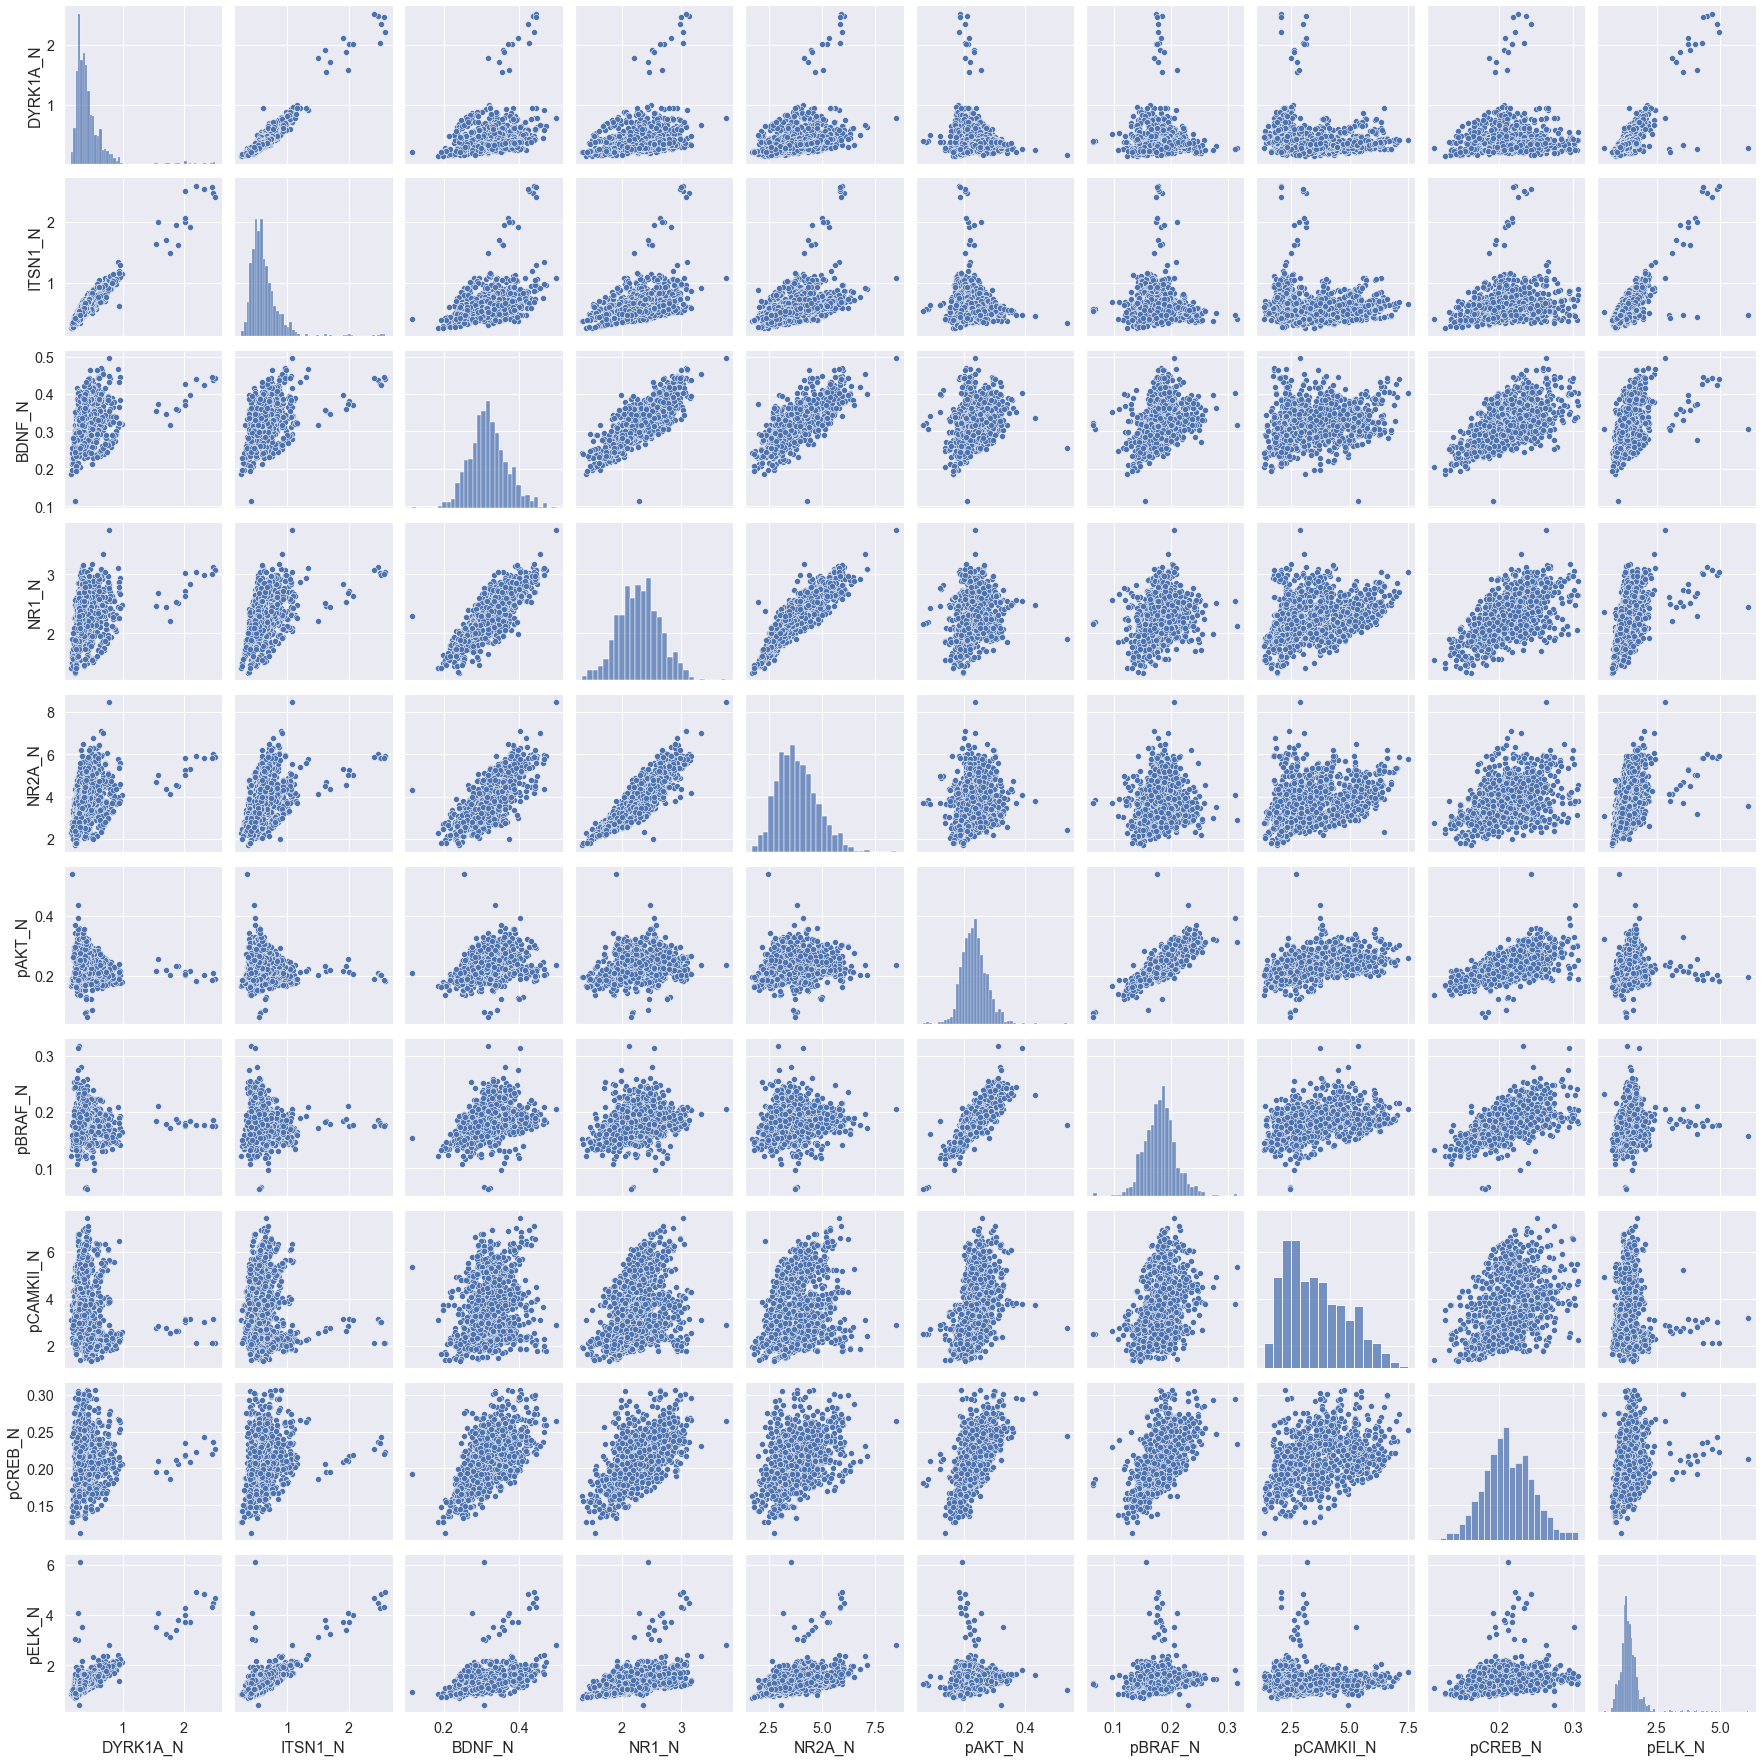

In [33]:
Index = ['DYRK1A_N','ITSN1_N','BDNF_N','NR1_N','NR2A_N','pAKT_N','pBRAF_N','pCAMKII_N','pCREB_N','pELK_N']

sns.pairplot(data[Index])

При визуализации в двумерных проекциях можно также строить ядерные оценки плотности:

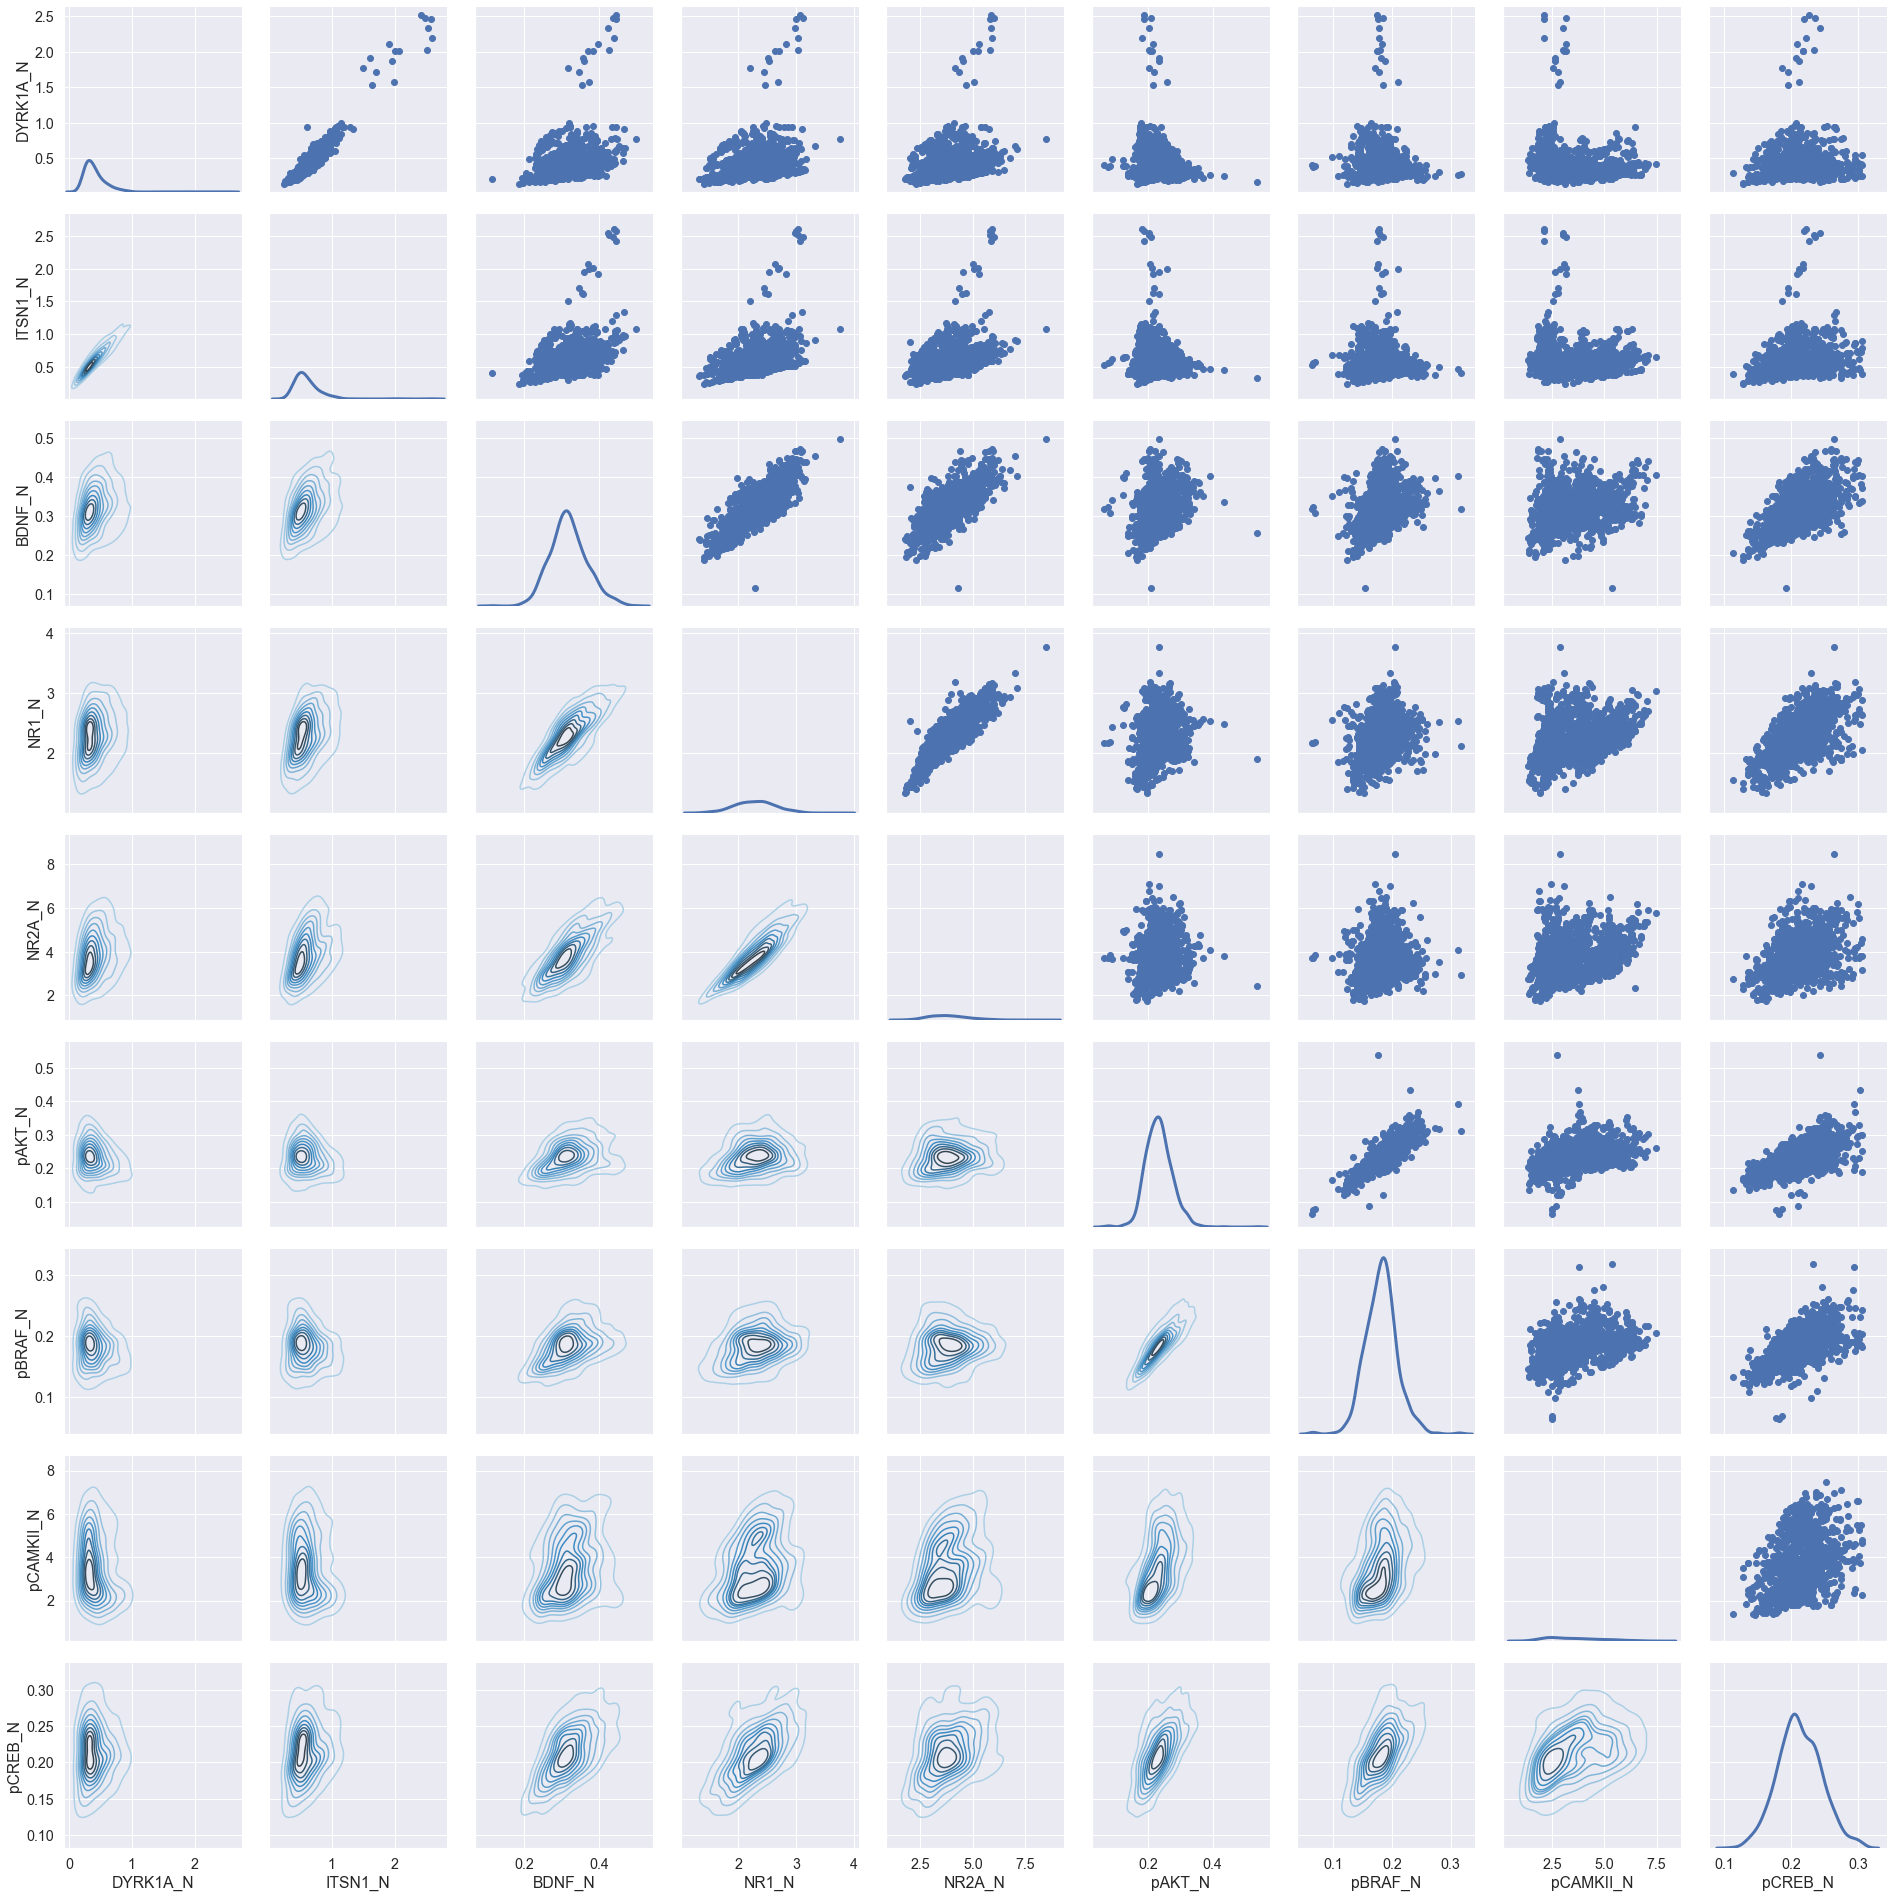

In [34]:
g = sns.PairGrid(data.iloc[:, 1:10].dropna(), height=3)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

Посчитайте корреляционную матрицу признаков, соответствующих белкам, и выведите ее с помощью `sns.heatmap`, также выведя значения коэффициентов корреляции в ячейках матрицы.

а) для первых 15 признаков. Сравните корреляционные матрицы, полученные  с использованием трех известных вам коэффициентов корреляции.


б) для всех признаков с использованием коэффициента Спирмена.



<AxesSubplot:>

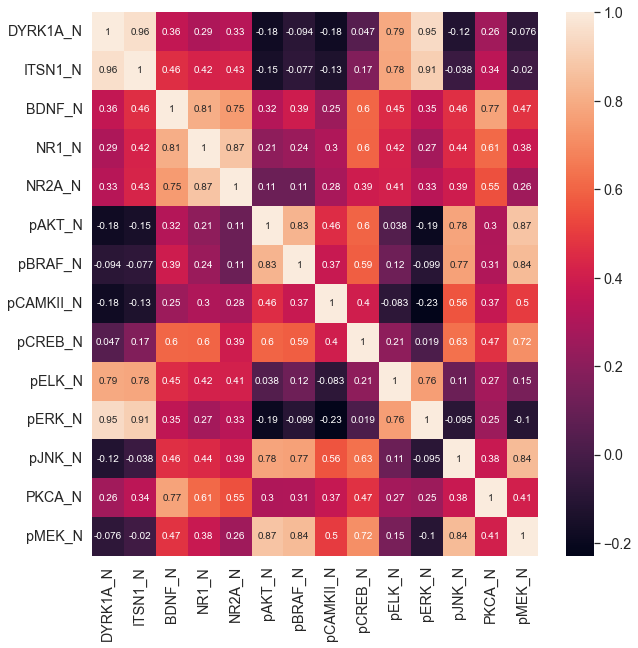

In [50]:
plt.figure(figsize = (10,10))
sns.heatmap(data[data.columns[1:15]].corr(method = 'pearson'),annot=True, annot_kws = {'fontsize':10})

<AxesSubplot:>

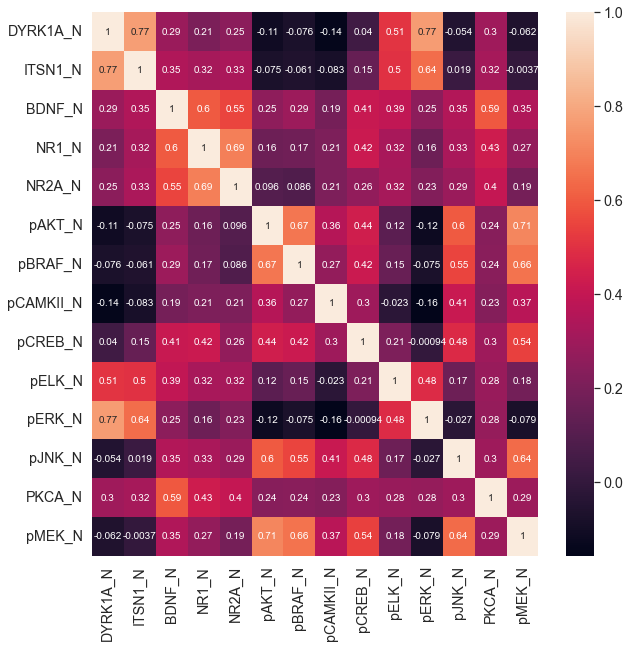

In [51]:
plt.figure(figsize = (10,10))
sns.heatmap(data[data.columns[1:15]].corr(method = 'kendall'),annot=True, annot_kws = {'fontsize':10})

<AxesSubplot:>

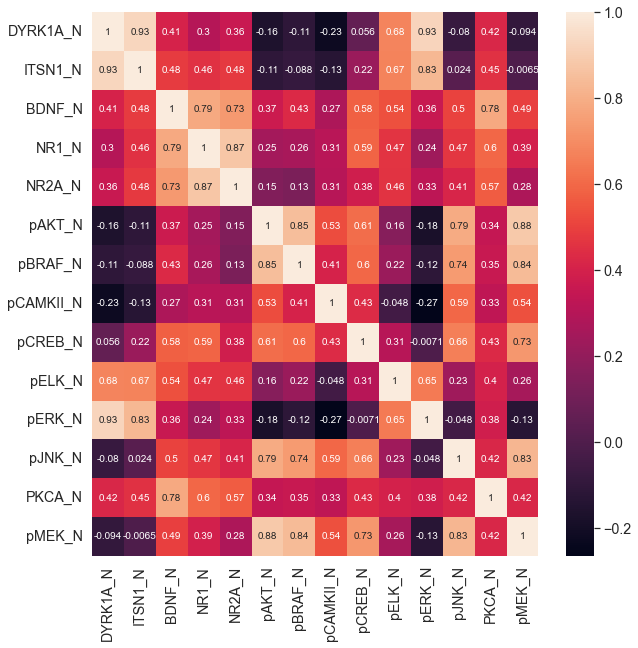

In [52]:
plt.figure(figsize = (10,10))
sns.heatmap(data[data.columns[1:15]].corr(method = 'spearman'),annot=True, annot_kws = {'fontsize':10})

<AxesSubplot:>

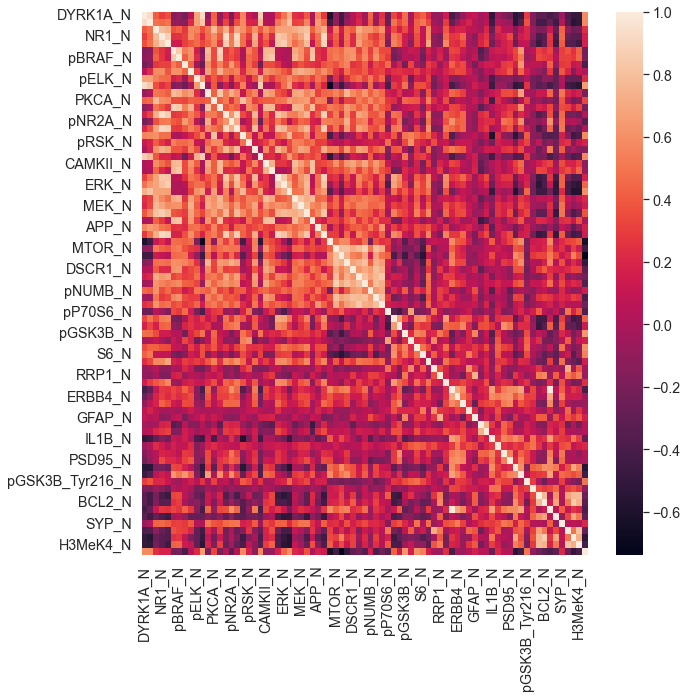

In [54]:
plt.figure(figsize = (10,10))
sns.heatmap(data[data.columns[1:]].corr(method = 'spearman'))

Выведя графики и коэффициенты корреляции можно сказать, что некоторые признаки дейтвительно скорелировано. Для более
точного анализа нужно посчитать p-v и принменить множественную проверку гипотез

На heatmap, проверку не прошли бы наиболее светлые ячейки

**Вывод**

Далее мы будем исследовать зависимость уровня экспрессии от генотипа. У нас имеется всего два генотипа: обычные мыши и мыши с синдромом Дауна.



Визуализируйте двумерные проекции данных и ядерные оценки плотности с использованием `sns.PairGrid` отдельно по генотипам. Используйте `hue='Genotype'` при вызове `sns.PairGrid`. По параметру `hue`  происходит разделение датасета.

####1. Корреляционный анализ

##### 1.1 Влияние генотипа на экспрессию DYRK1A_N 



С помощью ядерных оценок плотности посмотрите, как отличаются распределения `DYRK1A_N` для разных генотипов.

numpy.float64

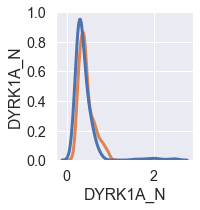

In [94]:
g = sns.PairGrid(data[['DYRK1A_N','Genotype']], height=3 , hue = 'Genotype')
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

Избавьтесь от выбросов и `nan`. Разделите все значения на 5 корзин и составьте таблицу сопряженности. Можно воспользоваться функцией `np.histogram2d`. В итоге у вас должна получиться таблица размера $5\times2$.


Избавимся от выбросов:

(array([589., 360.,  96.,  17.,   0.,   1.,   3.,   5.,   2.,   4.]),
 array([0.1453265 , 0.38243059, 0.61953468, 0.85663877, 1.09374285,
        1.33084694, 1.56795103, 1.80505512, 2.0421592 , 2.27926329,
        2.51636738]),
 <BarContainer object of 10 artists>)

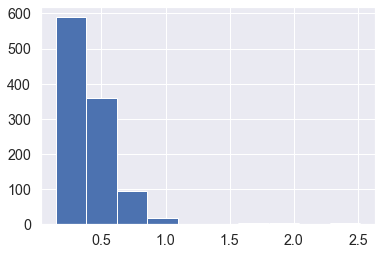

In [107]:
plt.hist(data['DYRK1A_N'][data['DYRK1A_N'] < 10])

(array([2., 1., 1., 2., 3., 1., 1., 0., 1., 3.]),
 array([1.53904762, 1.63677959, 1.73451157, 1.83224355, 1.92997552,
        2.0277075 , 2.12543947, 2.22317145, 2.32090343, 2.4186354 ,
        2.51636738]),
 <BarContainer object of 10 artists>)

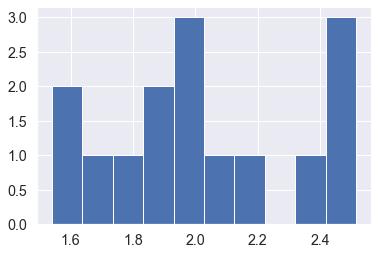

In [108]:
plt.hist(data['DYRK1A_N'][data['DYRK1A_N'] > 1])

Видно, что после 1.5 идет странный хвост. Попробуем его убрать

Примените критерий хи-квадрат. Следите за условиями применимости критерия.

Нужно разделить данные на 5 кучек

In [269]:
Table = np.zeros((2,5))
Intervals = [0,0.3,0.4,0.6,0.7,np.inf]
array = np.array(data['DYRK1A_N'][data['DYRK1A_N'] < 1.5])
gen_array = np.array(np.array(data['Genotype'][data['DYRK1A_N'] < 1.5]))
n = len(array)

In [270]:
for i in range(5):
    Table[0][i] = len(array[(array > Intervals[i]) & (Intervals[i+1] >= array ) & (gen_array == 'Control') ])
    Table[1][i] = len(array[(array > Intervals[i]) & (Intervals[i+1] >= array ) & (gen_array != 'Control') ])

In [154]:
Table

array([[229., 168., 123.,  23.,  12.],
       [ 96., 147., 167.,  42.,  55.]])

In [165]:
Table.sum(axis = 1), Table.sum(axis = 0) #min = 65*507/n > 5 

(array([555., 507.]), array([325., 315., 290.,  65.,  67.]))

Реализуем подсчет критерия:

In [261]:
def Xi_sq(Table):
    ans = 0
    for i in range(Table.shape[0]):
        for j in range(Table.shape[1]):
            ans += (Table[i][j] - np.sum(Table[i])*np.sum(Table[:,j])/np.sum(Table))**2 / (np.sum(Table[i])*np.sum(Table[:,j])/np.sum(Table))
    return ans

In [271]:
Xi_sq(Table), sps.chi2.ppf(0.95,4)

(93.6762891993339, 9.487729036781154)

Мы очистили, выборку от предполагаемых выбросов, составили таблицу сопряженности, проверив применимость. По критерию хи квадрат вышло, что свзяь есть. Это так же видно и на kde. То есть эксперссия этого гена, влияет на здоровье мышей

Сделайте выводы.

**Вывод**

##### 1.1 Влияние генотипа на экспрессию BDNF_N

Проведите те же исследования для признака  BDNF_N, начиная с ядерных оценок. Сделайте выводы.

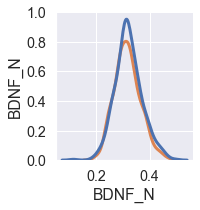

In [239]:
g = sns.PairGrid(data[['BDNF_N','Genotype']], height=3 , hue = 'Genotype')
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

(array([  1.,   1.,  22., 137., 274., 345., 176.,  89.,  26.,   6.]),
 array([0.1151814 , 0.15337925, 0.19157709, 0.22977494, 0.26797278,
        0.30617063, 0.34436848, 0.38256632, 0.42076417, 0.45896201,
        0.49715986]),
 <BarContainer object of 10 artists>)

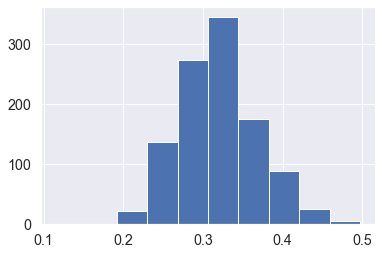

In [189]:
plt.hist(data['BDNF_N'])

(array([1., 0., 0., 0., 0., 0., 0., 0., 1., 3.]),
 array([0.1151814 , 0.12347913, 0.13177686, 0.14007459, 0.14837232,
        0.15667005, 0.16496778, 0.17326551, 0.18156324, 0.18986097,
        0.1981587 ]),
 <BarContainer object of 10 artists>)

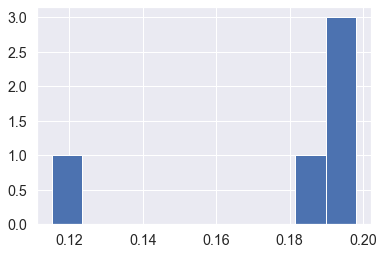

In [190]:
plt.hist(data['BDNF_N'][data['BDNF_N'] < 0.2] )

In [263]:
Table = np.zeros((2,5))
Intervals = [0,0.25,0.285,0.31,0.37,np.inf]
array = np.array(data['BDNF_N'][data['BDNF_N'] > 0.14])
gen_array = np.array(np.array(data['Genotype'][data['BDNF_N'] > 0.14]))
n = len(array)

In [264]:
for i in range(5):
    Table[0][i] = len(array[(array > Intervals[i]) & (Intervals[i+1] >= array ) & (gen_array == 'Control') ])
    Table[1][i] = len(array[(array > Intervals[i]) & (Intervals[i+1] >= array ) & (gen_array != 'Control') ])

In [265]:
Table

array([[ 36.,  91., 113., 241.,  88.],
       [ 40.,  85., 107., 199.,  76.]])

In [266]:
Table.sum(axis = 1), Table.sum(axis = 0) #min = 76*507/n > 5 

(array([569., 507.]), array([ 76., 176., 220., 440., 164.]))

In [267]:
Xi_sq(Table), sps.chi2.ppf(0.95,4)

(1.8996643040997465, 9.487729036781154)

В этом случае, критерий не отвеграет гипотезу о независимости. Это похоже на правду, так так kde мало отличаются. Значит пока что можно предполагать, что здоровье мышей и этот ген не свзаны

**Вывод**

Продолжение следует...